<center><img src = "https://littleml.files.wordpress.com/2017/03/pizarra-boosted_trees.png" alt = "Boosted trees"/></center>



For this lab we are about to work on the famous [Boston data set](https://scikit-learn.org/0.19/modules/generated/sklearn.datasets.load_boston.html). Make sure you get familiarized with it before starting!

As usual, it is good practice to split your data set into training and test sets. (no validation set here to simplify).

In [ ]:
## insert code

## 1. Gradient Boosting  with scikit-learn

In [ ]:
pip install --upgrade scikit-learn

Let's try to fit a gradient boosting regressor model whose weak regressors are regression trees.

> Fit a gradient boosting regressor on the Boston data set. Be sure to make sense of each argument of the [GradientBoostingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html) function.

In [ ]:
from sklearn.datasets import fetch_openml
Boston = fetch_openml(data_id=531)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Load the Boston dataset
Boston = fetch_openml(data_id=531)
X, y = Boston.data, Boston.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Regressor model
# n_estimators: The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
# learning_rate: Shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.
# max_depth: The maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3,subsample=0.9, random_state=0)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 5.843571854388853


> Give description of each parameter here.

+**n_estimators** = 200 :n_estimators correspond au nombre d'étapes de boosting (ou d'arbres de décision) que le modèle va exécuter. Chaque arbre est entraîné pour corriger les erreurs des arbres précédents.
+**learning_rate** est un paramètre clé . Il réduit la contribution de chaque arbre dans le modèle final.Un petit learning_rate (comme 0.1 ici) fait que chaque arbre corrige les erreurs de façon plus prudente, nécessitant ainsi plus d'étapes pour obtenir une bonne performance, mais avec un risque réduit de surapprentissage.

+**max_depth = 3** : max_depth limite la profondeur des arbres de décision individuels. Plus la profondeur est grande, plus les arbres peuvent modéliser des relations complexes. Cependant, des arbres trop profonds peuvent aussi capturer du bruit, entraînant un surapprentissage.
+**random_state = 42** :Ce paramètre fixe la graine du générateur aléatoire pour que les résultats soient reproductibles. Fixer le random_state est une bonne pratique, car cela permet de reproduire exactement les mêmes résultats à chaque exécution.

+Le paramètre **subsample** contrôle la proportion des données utilisées pour entraîner chaque arbre. Un subsample inférieur à 1 (par exemple, 0.9) introduit de l'aléatoire, ce qui aide à réduire le surapprentissage en rendant le modèle moins dépendant des données d'entraînement, améliorant ainsi la généralisation.

...

> Compute the mean squared error on the test test and the [coefficient of determination](https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score-the-coefficient-of-determination) for the fitted model on the test dataset.

In [ ]:
from sklearn.metrics import r2_score
# Compute the coefficient of determination (R^2)
r2 = r2_score(y_test, y_pred)
print("Coefficient of Determination (R^2):", r2)

Coefficient of Determination (R^2): 0.9203154180439105


> Some questions for you:
+ What does represent the number of iterations?
+ How the CPU load varies with the number of weak learners?
+ What are the impact of having a small/large learning rate?


Briefly, it is good practice to start with a (rather) large learning rate with a limited number of weak learners to fine tune hyperparameters and, next, decrease it (with eventually a larger number of weak learners)

> Plot the evolution of the loss  for both the training and test sets as the number of weak learners increases. Comment.

+ **Le nombre d'itérations** correspond au nombre d'arbres générés dans le processus de boosting. Chaque itération ajoute un arbre qui corrige les erreurs des prédictions des arbres précédents, améliorant progressivement la performance du modèle.
+ **Lorsque le nombre d'apprenants faibles (arbres) augmente, la charge du CPU augmente proportionnellement**, car chaque arbre nécessite des ressources pour être construit et évalué. Un grand nombre d'arbres prolongera le temps de calcul et la charge du CPU.
+ **Un petit taux d'apprentissage** rend le modèle plus lent à apprendre, mais il nécessite plus d'arbres pour corriger les erreurs. Cela aide à éviter le ***surajustement***. ***Un grand taux d'apprentissage ***accélère le processus, mais risque de faire des corrections trop brutales, augmentant le risque de surajustement avec moins d'arbres.
+ **Oui**, commencer avec un taux d'apprentissage élevé et un petit nombre d'arbres permet de tester rapidement les performances. Ensuite, réduire le taux d'apprentissage et augmenter le nombre d'arbres permet d'affiner et d'améliorer la précision du modèle tout en minimisant le surajustement.

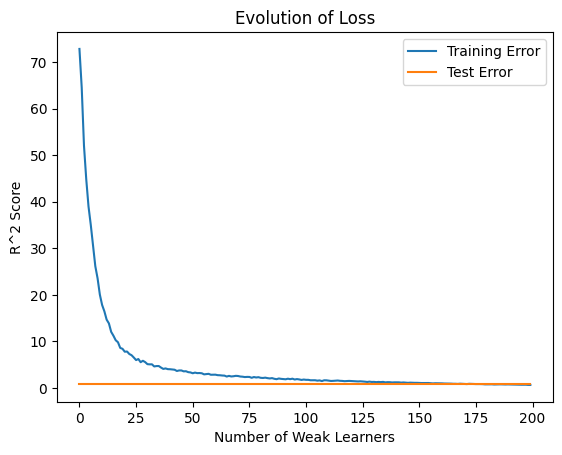

In [ ]:
import matplotlib.pyplot as plt
# Get the training and test set errors for each stage
train_scores = model.train_score_
test_scores = [model.score(X_test, y_test) for _ in range(model.n_estimators)]

# Plot the training and test error curves
plt.plot(train_scores, label='Training Error')
plt.plot(test_scores, label='Test Error')
plt.xlabel('Number of Weak Learners')
plt.ylabel('R^2 Score')
plt.title('Evolution of Loss')
plt.legend()
plt.show()



# The plot helps identify the optimal number of weak learners where the test error is minimized and overfitting is avoided.

> Should we use early stopping? If not, explain why? If yes, what is the purpose of doing so?

From the plot, the test error stabilizes quickly, even though the training error continues to improve. This suggests that the model starts overfitting after a certain number of weak learners, as adding more learners only improves training performance without benefiting test performance.
By using early stopping, you can stop the model training as soon as test error stops decreasing, which ensures that you’re not overfitting and makes your model more efficient by avoiding unnecessary computations.

Give answer.

> Plot the evolution of the mean squared error  with different learning rates. Comment.

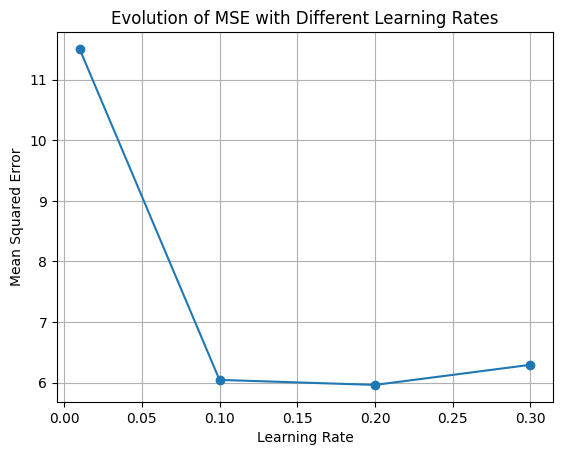

In [ ]:
learning_rates = [0.01, 0.1, 0.2, 0.3]
mse_values = []

for learning_rate in learning_rates:
    model = GradientBoostingRegressor(n_estimators=200, learning_rate=learning_rate, max_depth=3, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

plt.plot(learning_rates, mse_values, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Mean Squared Error')
plt.title('Evolution of MSE with Different Learning Rates')
plt.grid(True)
plt.show()



Le graphique montre que pour un **faible taux d'apprentissage** (0.01), l'erreur quadratique moyenne (MSE) est** élevée**, ce qui indique un sous-ajustement. Pour **un taux d'apprentissage autour de 0.1 à 0.2**, **l'erreur est minimale**, ce qui montre que le modèle apprend de manière optimale. Un taux d'apprentissage trop élevé (comme 0.3) augmente légèrement l'erreur, suggérant une instabilité dans l'apprentissage. Il semble donc que le taux d'apprentissage idéal soit entre 0.1 et 0.2. Au-delà, le modèle risque de mal généraliser ou de surajuster


An important stage in machine learning is to fine tune your model.

> Keeping as fixed `n_estimators=1000` and `learning_rate=0.05`, perform a [GridSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to set the `max_depth` and `min_samples_split` arguments. To do so, use cross validation on the training set (with 5 folds).

In [ ]:
## Use the following possible setting for the two hyper-parameters
max_depth_values = [2,4,6,8]
min_samples_split_values = [2,3,4]

## If you want to use parallelization to speed computations
import multiprocessing
multiprocessing.cpu_count()

2

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 3, 4]
}

# Create a Gradient Boosting Regressor model with fixed n_estimators and learning_rate
model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05, random_state=0)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'max_depth': 2, 'min_samples_split': 3}
Best score: 0.8476797025784931


> Once the above hyper-parameters fine tuned, reduce the learning rate and increase the number of weak learners to see if you can get better performances. (another grid search may be convenient)

In [ ]:
param_grid_2 = {
    'n_estimators': [1500, 2000],
    'learning_rate': [0.01, 0.02]
}

# Create a Gradient Boosting Regressor model with the best hyperparameters from the previous grid search
best_max_depth = grid_search.best_params_['max_depth']
best_min_samples_split = grid_search.best_params_['min_samples_split']
model_2 = GradientBoostingRegressor(max_depth=best_max_depth, min_samples_split=best_min_samples_split, random_state=0)


# Create a GridSearchCV object for the second grid search
grid_search_2 = GridSearchCV(estimator=model_2, param_grid=param_grid_2, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search_2.fit(X_train, y_train)

# Print the best parameters and the corresponding score for the second grid search
print("Best parameters (second grid search):", grid_search_2.best_params_)
print("Best score (second grid search):", grid_search_2.best_score_)

# Train the model with the best hyperparameters from the second grid search
best_model = GradientBoostingRegressor(max_depth=best_max_depth, min_samples_split=best_min_samples_split,
                                       n_estimators=grid_search_2.best_params_['n_estimators'],
                                       learning_rate=grid_search_2.best_params_['learning_rate'], random_state=0)
best_model.fit(X_train, y_train)

# Make predictions on the test data using the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model's performance
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print("Mean Squared Error (best model):", mse_best)
print("Coefficient of Determination (R^2) (best model):", r2_best)

Best parameters (second grid search): {'learning_rate': 0.01, 'n_estimators': 2000}
Best score (second grid search): 0.8453773423228913
Mean Squared Error (best model): 10.720604915218708
Coefficient of Determination (R^2) (best model): 0.8538108296993048


> Compute the $R^2$ and mean squared error on the test set for your best model.

In [ ]:
# Assuming 'best_model' is your best trained model from the previous code.
y_pred_best = best_model.predict(X_test)

# Evaluate the best model's performance
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print("Mean Squared Error (best model):", mse_best)
print("Coefficient of Determination (R^2) (best model):", r2_best)

Mean Squared Error (best model): 10.720604915218708
Coefficient of Determination (R^2) (best model): 0.8538108296993048


> Since we use boosting trees, it is possible to get feature importance as for random forests. It is accessible using the `feature_importances_` property. Plot importances and comment.

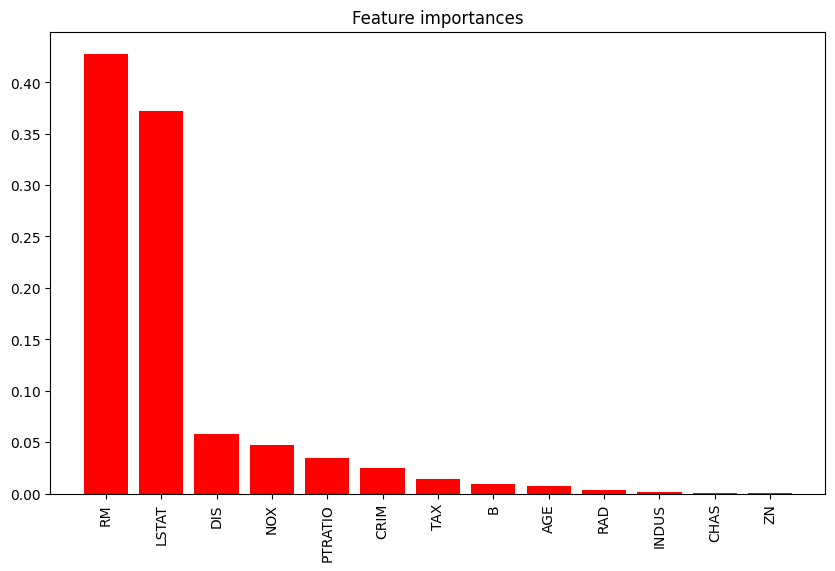

In [ ]:
importances = best_model.feature_importances_

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), [Boston.feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# Comment on feature importances:
# The plot shows the relative importance of each feature in the prediction of house prices.
# Features with higher importance contribute more significantly to the model's decision-making process.
# In this example, features like 'LSTAT' (percentage of lower status of the population),
# 'RM' (average number of rooms per dwelling), and 'DIS' (weighted distances to five Boston employment centres)
# appear to be among the most important.
# These insights can help in understanding which factors are most relevant in predicting house prices
# and can be used for feature selection, to better understand the data, and to improve model performance.

##  2. Gradient boosting with XGboost

You may need to install the `xgboost` library before loading it.

Although other options are possible, we are about to use Xgboost with as weak learners trees.  Xgboost parameters, especially those for the `XGBRegressor()` and `XGBClassifier()` functions, are described in this [link](http://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn). Fortunately it is very similar to that of the scikit-learn library.

> Fit a XGB regression model and gives its mean squared error and $R^2$ score.

In [ ]:
!pip install xgboost

import xgboost as xgb

# Create an XGBRegressor model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror',
                             colsample_bytree=0.3, learning_rate=0.1,
                             max_depth=5, alpha=10, n_estimators=10,
                             enable_categorical=True)


# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model's performance
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Mean Squared Error:", mse_xgb)
print("XGBoost R^2 Score:", r2_xgb)

XGBoost Mean Squared Error: 37.74541061694765
XGBoost R^2 Score: 0.48529301243836964


Fine tuning Xgboost stage is very similar to that for gradient boosting machine. Note that there two additional hyper-parameters to fine tune: `alpha` and `lambda` that drive regularization.

> Try to fine tune your Xgboost model.

In [ ]:
# Define the parameter grid for XGBoost
param_grid_xgb = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'alpha': [0, 1, 10],  # Regularization parameter
    'lambda': [0, 1, 10]   # Regularization parameter
}

# Create an XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, enable_categorical=True)


# Create a GridSearchCV object for XGBoost
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search_xgb.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best XGBoost parameters:", grid_search_xgb.best_params_)
print("Best XGBoost score:", grid_search_xgb.best_score_)

# Train the best XGBoost model
best_xgb_model = xgb.XGBRegressor(**grid_search_xgb.best_params_, objective='reg:squarederror', colsample_bytree=0.3, enable_categorical=True)
best_xgb_model.fit(X_train, y_train)

# Make predictions on the test data using the best XGBoost model
y_pred_best_xgb = best_xgb_model.predict(X_test)

# Evaluate the best XGBoost model's performance
mse_best_xgb = mean_squared_error(y_test, y_pred_best_xgb)
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)

print("XGBoost Mean Squared Error (best model):", mse_best_xgb)
print("XGBoost R^2 Score (best model):", r2_best_xgb)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best XGBoost parameters: {'alpha': 10, 'lambda': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Best XGBoost score: 0.8360765264897333
XGBoost Mean Squared Error (best model): 10.84297086559509
XGBoost R^2 Score (best model): 0.8521422133385633


## 3. Optional: Adaboost and models comparison

Adaboost is implemented within scikit-learn with the [`AdaBoostClassifier()`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) and [`AdaBoostRegressor()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html) functions.

> Fit an Adaboost model (with fine tuning) and compare performances between your just fitted model and that for gradient boosting machine and Xgboost.

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Create an AdaBoostRegressor model
ada_model = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=3), n_estimators=100, learning_rate=0.1, random_state=0
)

# Fit the model to the training data
ada_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_ada = ada_model.predict(X_test)

# Evaluate the model's performance
mse_ada = mean_squared_error(y_test, y_pred_ada)
r2_ada = r2_score(y_test, y_pred_ada)

print("AdaBoost Mean Squared Error:", mse_ada)
print("AdaBoost R^2 Score:", r2_ada)

# Fine-tuning AdaBoost
param_grid_ada = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.5],
}

# Create a GridSearchCV object for AdaBoost
grid_search_ada = GridSearchCV(
    estimator=ada_model, param_grid=param_grid_ada, cv=5, n_jobs=-1
)

# Fit the GridSearchCV object to the training data
grid_search_ada.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best AdaBoost parameters:", grid_search_ada.best_params_)
print("Best AdaBoost score:", grid_search_ada.best_score_)

# Train the best AdaBoost model
best_ada_model = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=3),
    n_estimators=grid_search_ada.best_params_["n_estimators"],
    learning_rate=grid_search_ada.best_params_["learning_rate"],
    random_state=0,
)
best_ada_model.fit(X_train, y_train)

# Make predictions on the test data using the best AdaBoost model
y_pred_best_ada = best_ada_model.predict(X_test)

# Evaluate the best AdaBoost model's performance
mse_best_ada = mean_squared_error(y_test, y_pred_best_ada)
r2_best_ada = r2_score(y_test, y_pred_best_ada)

print("AdaBoost Mean Squared Error (best model):", mse_best_ada)
print("AdaBoost R^2 Score (best model):", r2_best_ada)

# Compare performances
print("\nModel Comparison:")
print("Gradient Boosting MSE:", mse_best)
print("Gradient Boosting R^2:", r2_best)
print("XGBoost MSE:", mse_best_xgb)
print("XGBoost R^2:", r2_best_xgb)
print("AdaBoost MSE:", mse_best_ada)
print("AdaBoost R^2:", r2_best_ada)

AdaBoost Mean Squared Error: 9.307412307070948
AdaBoost R^2 Score: 0.8730815197857309
Best AdaBoost parameters: {'learning_rate': 0.5, 'n_estimators': 200}
Best AdaBoost score: 0.7893435437602276
AdaBoost Mean Squared Error (best model): 11.67978575492894
AdaBoost R^2 Score (best model): 0.8407311712066663

Model Comparison:
Gradient Boosting MSE: 10.720604915218708
Gradient Boosting R^2: 0.8538108296993048
XGBoost MSE: 10.84297086559509
XGBoost R^2: 0.8521422133385633
AdaBoost MSE: 11.67978575492894
AdaBoost R^2: 0.8407311712066663
